In [1]:
from google.colab import drive
import pandas as pd

# Mount Drive if not already mounted
drive.mount('/content/drive')

# Load cleaned dataset
file_path = '/content/drive/MyDrive/DataSet/cleaned_DataScientist.csv'
df = pd.read_csv(file_path)

# Preview Company Name column
df['Company Name'].head()

Mounted at /content/drive


,Company Name
0,hopper 3.5
1,noom us 4.5
2,decode_m
3,sapphire digital 3.4
4,united entertainment group 3.4


In [3]:
# Step 1: Clean the Company Name Column

import re

# Remove numeric ratings or scores from company name (e.g., "hopper 3.5" -> "hopper")
def clean_company_name(name):
    name = re.sub(r'\\n', ' ', str(name))           # Replace \n with space
    name = re.sub(r'\d+\.\d+$', '', name)           # Remove rating at the end (like 3.5)
    name = re.sub(r'\s+', ' ', name).strip().lower()  # Normalize whitespace and lowercase
    return name

# Apply cleaning
df['Cleaned Company Name'] = df['Company Name'].apply(clean_company_name)

# Preview cleaned names
df[['Company Name', 'Cleaned Company Name']].head(10)


,Company Name,Cleaned Company Name
0,hopper 3.5,hopper
1,noom us 4.5,noom us
2,decode_m,decode_m
3,sapphire digital 3.4,sapphire digital
4,united entertainment group 3.4,united entertainment group
5,ifg companies 2.9,ifg companies
6,quartet health 3.9,quartet health
7,pulsepoint 4.4,pulsepoint
8,medidata solutions 4.3,medidata solutions
9,point72 3.9,point72


In [5]:
# Step 2: Count and Rank Top Hiring Companies

# Count job postings by company
top_companies = df['Cleaned Company Name'].value_counts().head(10)

# Display result
top_companies

,count
Cleaned Company Name,
ibm,48
apple,42
amazon,35
"staffigo technical services, llc",28
diverse lynx,25
facebook,22
solekai systems corp,22
varsity tutors,21
humana,20


/tmp/ipython-input-4033740678.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='mako')


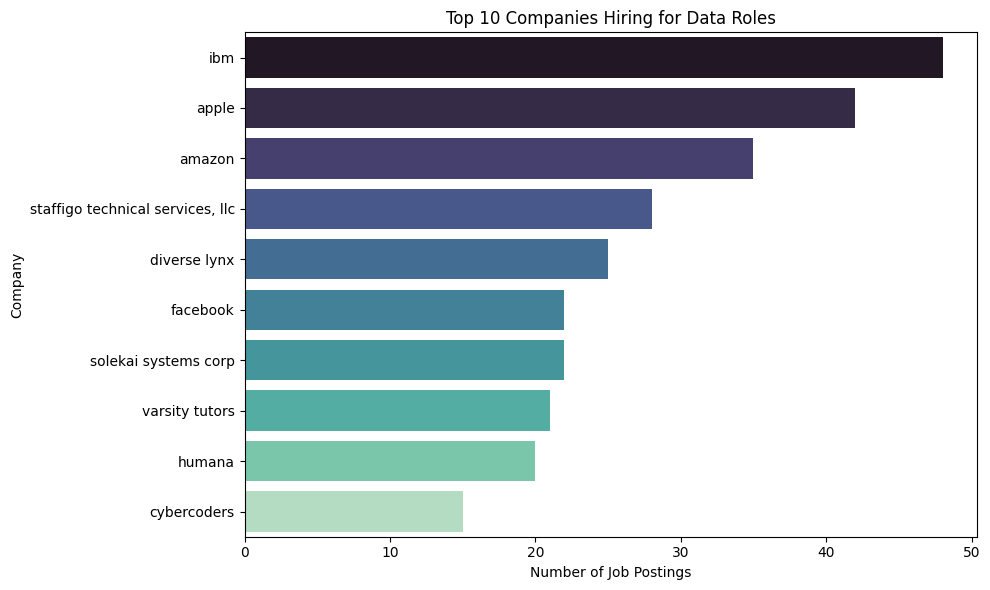

In [6]:
# Step 3: Visualize Top 10 Companies Hiring

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the top 10 companies hiring
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='mako')
plt.title('Top 10 Companies Hiring for Data Roles')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

## 📅 Day 4: Top Companies Hiring Analysis

**Dataset Used:** `cleaned_DataScientist.csv`

---

### Objective:
To identify and visualize the companies posting the most jobs for data-related roles.

---

### Steps Performed:

1. **Loaded Cleaned Dataset**
   - Pulled from Google Drive using `pandas`.

2. **Cleaned `Company Name` Column**
   - Removed trailing numeric ratings (e.g., "hopper 3.5" → "hopper")
   - Normalized text to lowercase and stripped excess whitespace

3. **Created `Cleaned Company` Column**
   - Used for counting consistent job postings

4. **Ranked Top Hiring Companies**
   - Displayed top 10 companies with the most job listings

5. **Visualized Using Bar Chart**
   - Created a clean horizontal bar chart using Seaborn and Matplotlib

---

### Top 5 Hiring Companies:
1. IBM (48 postings)  
2. Apple (42 postings)  
3. Amazon (35 postings)  
4. Staffigo Technical Services, LLC (28 postings)  
5. Diverse Lynx (25 postings)

---
